## Whether the client has subscribed a term deposit or not 
- Binomial ("yes" or "no")

## Attribute information For bank dataset
- # Input variables: bank client data
    - 1 - age (numeric)
    - 2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services")
    - 3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
    - 4 - education (categorical: "unknown","secondary","primary","tertiary")
    - 5 - default: has credit in default? (binary: "yes","no")
    - 6 - balance: average yearly balance, in euros (numeric)
    - 7 - housing: has housing loan? (binary: "yes","no")
    - 8 - loan: has personal loan? (binary: "yes","no")
- # related with the last contact of the current campaign:
    - 9 - contact: contact communication type (categorical: "unknown","telephone","cellular")
    - 10 - day: last contact day of the month (numeric)
    - 11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
    - 12 - duration: last contact duration, in seconds (numeric)
- # other attributes:
    - 13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    - 14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
    - 15 - previous: number of contacts performed before this campaign and for this client (numeric)
    - 16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
- # Output variable (desired target):
    - 17 - y - has the client subscribed a term deposit? (binary: "yes","no")
    - 8. Missing Attribute Values: None


In [1]:
#Importing Required Libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
#importing the dataset
bank_df=pd.read_csv('bank-full.csv')

In [3]:
#Displaying the first five records of the Dataframe
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
bank_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
# Checking for Inconsistencies in the dataset
bank_df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [7]:
# One-Hot Encoding of categorical variables
bank_df1=pd.get_dummies(bank_df,columns=['job','marital','education','contact','poutcome','month'])
pd.set_option("display.max.columns", None)
bank_df1

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,no,2143,yes,no,5,261,1,-1,0,no,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,44,no,29,yes,no,5,151,1,-1,0,no,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,33,no,2,yes,yes,5,76,1,-1,0,no,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,47,no,1506,yes,no,5,92,1,-1,0,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,33,no,1,no,no,5,198,1,-1,0,no,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,17,977,3,-1,0,yes,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
45207,71,no,1729,no,no,17,456,2,-1,0,yes,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
45208,72,no,5715,no,no,17,1127,5,184,3,yes,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
45209,57,no,668,no,no,17,508,4,-1,0,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [8]:
bank_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  45211 non-null  int64 
 1   default              45211 non-null  object
 2   balance              45211 non-null  int64 
 3   housing              45211 non-null  object
 4   loan                 45211 non-null  object
 5   day                  45211 non-null  int64 
 6   duration             45211 non-null  int64 
 7   campaign             45211 non-null  int64 
 8   pdays                45211 non-null  int64 
 9   previous             45211 non-null  int64 
 10  y                    45211 non-null  object
 11  job_admin.           45211 non-null  uint8 
 12  job_blue-collar      45211 non-null  uint8 
 13  job_entrepreneur     45211 non-null  uint8 
 14  job_housemaid        45211 non-null  uint8 
 15  job_management       45211 non-null  uint8 
 16  job_

In [9]:
# Customize yes or no categorical data to 1 or 0 Binary for easy analysis
bank_df1['default']=bank_df1['default'].replace({'yes':1,'no':0})
bank_df1['housing']=bank_df1['housing'].replace({'yes':1,'no':0})
bank_df1['loan']=bank_df1['loan'].replace({'yes':1,'no':0})
bank_df1['y']=bank_df1['y'].replace({'yes':1,'no':0})

In [10]:
bank_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int64
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int64
 4   loan                 45211 non-null  int64
 5   day                  45211 non-null  int64
 6   duration             45211 non-null  int64
 7   campaign             45211 non-null  int64
 8   pdays                45211 non-null  int64
 9   previous             45211 non-null  int64
 10  y                    45211 non-null  int64
 11  job_admin.           45211 non-null  uint8
 12  job_blue-collar      45211 non-null  uint8
 13  job_entrepreneur     45211 non-null  uint8
 14  job_housemaid        45211 non-null  uint8
 15  job_management       45211 non-null  uint8
 16  job_retired          4

## Now all the columns are Numerical Values , we can go ahead and Build Logistic Regression Model for the above dataset to predict 'y'
## Building the model

In [11]:
# We need to separate Input varaibles(x1,x2,x3...) and Output Variable(y) and store it different variable
x=pd.concat([bank_df1.iloc[:,0:10],bank_df1.iloc[:,11:49]],axis=1)
x

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,0,2143,1,0,5,261,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,44,0,29,1,0,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,5,76,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,47,0,1506,1,0,5,92,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,33,0,1,0,0,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
45207,71,0,1729,0,0,17,456,2,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
45208,72,0,5715,0,0,17,1127,5,184,3,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
45209,57,0,668,0,0,17,508,4,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [12]:
y=bank_df1.iloc[:,10]
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
np.random.seed(113)
# Splitting into training and testing data
features_train, features_test, target_train,target_test = train_test_split(x,y, test_size = 0.25)
# Checking the shapes of the resulting datasets
print("Shape of features_train:", features_train.shape)
print("Shape of target_train:", target_train.shape)
print("Shape of features_test:", features_test.shape)
print("Shape of target_test:", target_test.shape)

Shape of features_train: (33908, 48)
Shape of target_train: (33908,)
Shape of features_test: (11303, 48)
Shape of target_test: (11303,)


In [14]:
features_train

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
44092,48,0,159,0,0,7,229,1,251,6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
467,50,0,71,1,0,6,678,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
16375,35,0,1345,1,0,23,135,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
12926,56,0,58932,0,0,7,339,2,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
25169,52,1,-2,0,0,18,245,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43778,27,0,2781,1,0,24,168,1,389,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
16236,45,0,295,1,0,23,92,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
30282,32,0,150,0,0,5,210,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
22690,37,0,566,0,0,25,463,4,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0


In [15]:
#building model
# the model can be built using sklearn.linear_model.LogisticRegression class
from sklearn.linear_model import LogisticRegression
# Creating the object of the class LogisticRegression
model = LogisticRegression()
# Training the model using the training data
model.fit(features_train, target_train)

LogisticRegression()

In [16]:
# Predicting the probabilities for each of the class labels
print("Predicted probability for class '0' and '1' respectively:")
model.predict_proba(features_test)

Predicted probability for class '0' and '1' respectively:


array([[0.99494363, 0.00505637],
       [0.98353497, 0.01646503],
       [0.89984288, 0.10015712],
       ...,
       [0.93000758, 0.06999242],
       [0.88869074, 0.11130926],
       [0.84318223, 0.15681777]])

In [17]:
print("Intercept:", model.intercept_,"\nCoefficients", model.coef_)

Intercept: [-0.31912601] 
Coefficients [[-1.77287202e-02 -2.35320932e-02  1.83237623e-05 -7.71717763e-01
  -2.24029654e-01 -1.08282841e-02  3.79271218e-03 -3.83415149e-01
   2.71073690e-03 -1.65890208e-01 -2.05823815e-02 -3.05001791e-01
  -2.96158697e-02 -9.19509134e-03  2.16322994e-03  1.89539258e-01
  -1.66154290e-02 -1.02824084e-01  3.63101210e-02 -7.17192065e-02
   5.54426209e-03  2.91329349e-03  3.09299367e-02 -2.08590396e-01
  -1.41423228e-01 -8.28647338e-02 -3.10638033e-01  6.00558154e-02
   1.43632644e-02  1.01249549e-01  6.26054783e-02 -4.82938714e-01
  -1.46709876e-01 -3.74017933e-02  3.51680249e-01 -4.86652268e-01
   3.76575632e-02  2.55567810e-02  3.59407480e-02 -1.26813660e-02
  -1.43998676e-02 -9.18257829e-02 -5.16845151e-02  9.66956357e-02
  -4.76685144e-01 -5.87328695e-02  1.12652693e-01  7.84224367e-02]]


## Accuracy = no. of correct predictions / total predictions
- The score() function of sklearn gives the accuracy for classification models.

In [18]:
train_accuracy = model.score(features_train, target_train)
test_accuracy = model.score(features_test, target_test)
print("Accuracy score of the model on training data:", model.score(features_train, target_train))
print("Accuracy score of the model on test data:", model.score(features_test, target_test))

Accuracy score of the model on training data: 0.8909991742361685
Accuracy score of the model on test data: 0.89356807927099


In [19]:
target_pred=model.predict(features_test)

In [20]:
from sklearn.metrics import confusion_matrix
test_conf_matrix = confusion_matrix(target_test,target_pred)
pd.DataFrame(test_conf_matrix ,columns = model.classes_,index = model.classes_)

,0,1
0,9815,190
1,1013,285


In [21]:
train_pred=model.predict(features_train)

In [22]:
train_conf_matrix = confusion_matrix(target_train,train_pred)
pd.DataFrame(train_conf_matrix ,columns = model.classes_,index = model.classes_)

,0,1
0,29340,577
1,3119,872


In [23]:
train_correct_predictions = train_conf_matrix[0][0] + train_conf_matrix[1][1]
train_total_predictions  = train_conf_matrix.sum()
train_accuracy = train_correct_predictions / train_total_predictions
print(train_accuracy)

0.8909991742361685


In [24]:
test_correct_predictions = test_conf_matrix[0][0] + test_conf_matrix[1][1]
test_total_predictions  = test_conf_matrix.sum()
test_accuracy = test_correct_predictions / test_total_predictions
print(test_accuracy)

0.89356807927099


In [25]:
model.predict_proba(x)[:,1] 

array([0.04217414, 0.02393937, 0.01717416, ..., 0.67873604, 0.08179632,
       0.08617224])

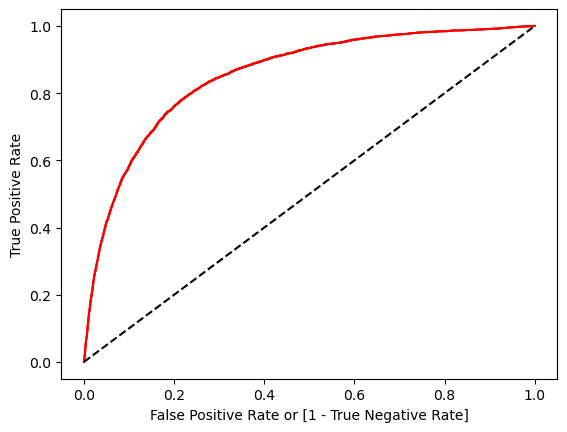

auc accuracy: 0.599771722091961


In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# ROC Curve plotting and finding AUC value
fpr,tpr,thresholds=roc_curve(y,model.predict_proba(x)[:,1])
plt.plot(fpr,tpr,color='red')
auc=roc_auc_score(y,model.predict(x))

plt.plot(fpr,tpr,color='red',label='logit model(area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

print('auc accuracy:',auc)